<a href="https://colab.research.google.com/github/surajjeoor/ITNPAI_Project_Forestcityclassifier/blob/main/ITNPAI1_Personal_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

#University of Stirling - Spring 2023

## ITNPAI1 - Deep Learning for Vision and NLP (2022/3)

---

---

# 1. **Problem definition** 

There is a need to create reliable and effective techniques to automatically categorise photos given the increasing volume of digital imagery. The richness and unpredictability of image information, as well as the necessity for robustness to image variables like lighting, stance, and occlusion, make image classification a tough task. A crucial area of research, picture categorization is also a critical task in many industries, including robotics, security, and healthcare. Thus, it is necessary to create sophisticated computer vision methods that can identify images reliably and effectively in a variety of fields.

One of the most important jobs in computer vision is the assignment of a label or a category to an input image based on the visual content of the image. The following are some examples of how crucial Image classification is to computer vision:

Identifying objects in an image and classifying them into distinct classes or categories can aid in object detection. This is helpful in applications like self-driving automobiles where it is necessary to identify and track items like pedestrians, traffic signs, and other vehicles.

By classifying photographs according to their content, it is possible to find related pictures in a sizable database. This is helpful in systems like content-based picture retrieval systems and image search engines.

In order to complete the objective, a dataset of labelled photos from Accra, Ghana, and Pune, India, will be used as training data to create a computer vision system that can reliably categorise images in the form of forests and streets in images from that location. The next step is to assess the algorithm's performance using photos from Stirling, Scotland—that wasn't a part of the training set. The classification task entails classifying forests from streets ensuring that the system can correctly categorise the same across various cities and environmental situations, such as shifting lighting, weather, and background, will be a problem.

[top](#scrollTo=4i5afvUbhmGo)
 

---
# 2. **Github Repository**

Repositories has been already created

---
# 3. **Dataset creation**

Datasets have been assembled 

[top](#scrollTo=4i5afvUbhmGo)

---

# 4. **Dataloader**

Here,we have implemented all the code related to pre-processing, and we are performing model testing and the prediction using tensorflow and keras. We are using Image dataset from directory. As a part of augmentation, we are resizing the actual input image.

[top](scrollTo=4i5afvUbhmGo)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Write your dataloader code here. Create more code cells if you find it necessary
import os
import cv2 as cv
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


#dataloader
data='/content/drive/MyDrive/Deep_Learning_Assignment/Classifier_dataset/train'
train_data_1=tf.keras.utils.image_dataset_from_directory(data,image_size=(256,256))

data_test='/content/drive/MyDrive/Deep_Learning_Assignment/Classifier_dataset/test'
test_data_1=tf.keras.utils.image_dataset_from_directory(data,image_size=(256,256))

Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [5]:
#checking the number of categories
os.listdir(data)

['Streets', 'Forests']

In [6]:
#converting images into The numpy array and representing those images
train_data_iterator=train_data_1.as_numpy_iterator()
batch=train_data_iterator.next()

In [7]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

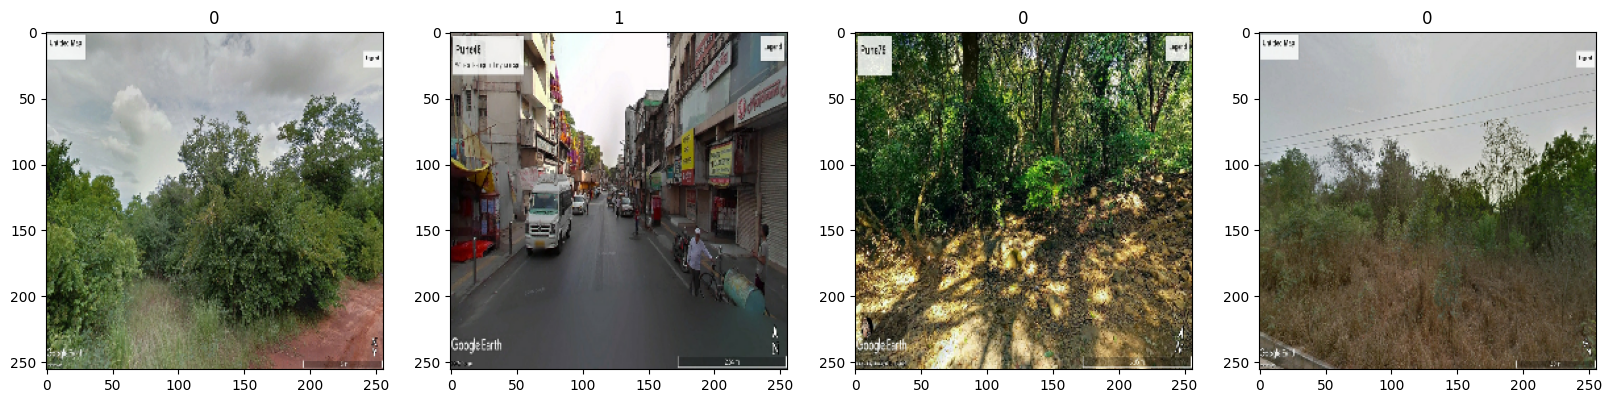

In [8]:
#Representing the images into the graphs
#IMPORTANT : 0 here represents forests and 1 Represents streets
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [9]:
#Normalizing values of Train Images between 0 - 1
train_data_1=train_data_1.map(lambda x,y:(x/255,y))

#checking whether the value has been Normalized in the range 0 to 1.
print(train_data_1.as_numpy_iterator().next()[0].max())

#Normalizing values of Test Images between 0 - 1
test_data_1=test_data_1.map(lambda x,y:(x/255,y))

#checking whether the value has been Normalized in the range 0 to 1.
print(test_data_1.as_numpy_iterator().next()[0].max())

1.0
1.0


---

# 5. **Proposed solution** 

Here, I have designed a neural network by following the tutorial. the code for the tutorial is available in this link : https://github.com/nicknochnack/ImageClassification then further, this solution has been tested and evaluated.

In this we firstly considered convolutional layers, in the first convolution layer,we introduced the number of filters as 16 and we kept kernel size as 3x3 matrix, here we havent considered to add attribute of padding as padding is kept valid by default for all convolution layers that has been used over here. After this we have introduced the number of strides as 1 and the activation has been kept as RelU to introduce some non-linearity.

Just after the convolutional layer, we are introducing Maxpooling layer. Maxpooling considers maximum value amongst pixels contained in 3x3 matrix and returns the single pixel as the output. such set of pixels are collected by striding around the input image and that set is passed through next convolution layers.

same set of layers has been repeated twice :  one for 32 number of filters and one for 16 number of filters.

We have shown the summary  under which we are describing the structure of the model.


[top](#scrollTo=4i5afvUbhmGo)

In [10]:
# Write your proposed solution code here. Create more code cells if you find it necessary
#building the deep learning model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model=Sequential()

#introducing 3 convolutional layers
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',))
model.add(MaxPooling2D())

#flattening the output of the third convolutional layer
model.add(Flatten())

#Adding it into dense convolutional layer
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




<h3>Models Compilation</h3>

Under this, the models optimizer and loss function can be initiallized. In our solution, we initialized optimizer as adam and as we are considering two classes over here, for loss, we are preferring binary cross entropy loss.

In [11]:
#setting the model's optimizer and loss function
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [12]:
#Describing the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [13]:
#creating the log directory in the tensor flow
logdir='logs'
tensoboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [14]:
#checking the number og batches for train data
len(train_data_1)

7

In [15]:
#splitting the data to train and validation
train_size=int(len(train_data_1)*.7)
print(train_size)
val_size=int(len(train_data_1)*.2)+2
print(val_size)

train1=train_data_1.take(train_size)
val1=train_data_1.take(val_size)


4
3


---

# 6. **Experimental tests and evaluations** 


  - *E1* - Training the models : the training data is divided into 7 parts, each part contains 32 Images and labels to be trained. We are training model for 10 Epochs and results are as per the bellow code snippets.

[top](#scrollTo=4i5afvUbhmGo)

In [16]:
# Training the model for 10 Epochs
hist=model.fit(train1,epochs=10,validation_data=val1,callbacks=[tensoboard_callback])




Epoch 1/10
4/4 [==============================] - 18s 4s/step - loss: 1.1208 - accuracy: 0.5156 - val_loss: 0.8101 - val_accuracy: 0.5104
Epoch 2/10
4/4 [==============================] - 17s 4s/step - loss: 0.6745 - accuracy: 0.6406 - val_loss: 0.6623 - val_accuracy: 0.4688
Epoch 3/10
4/4 [==============================] - 20s 5s/step - loss: 0.5938 - accuracy: 0.6953 - val_loss: 0.4745 - val_accuracy: 0.9167
Epoch 4/10
4/4 [==============================] - 17s 4s/step - loss: 0.3319 - accuracy: 0.9297 - val_loss: 0.2330 - val_accuracy: 0.9271
Epoch 5/10
4/4 [==============================] - 17s 4s/step - loss: 0.1865 - accuracy: 0.9297 - val_loss: 0.1793 - val_accuracy: 0.9167
Epoch 6/10
4/4 [==============================] - 20s 5s/step - loss: 0.1026 - accuracy: 0.9688 - val_loss: 0.0608 - val_accuracy: 0.9792
Epoch 7/10
4/4 [==============================] - 16s 4s/step - loss: 0.0875 - accuracy: 0.9609 - val_loss: 0.1357 - val_accuracy: 0.9479
Epoch 8/10
4/4 [==================

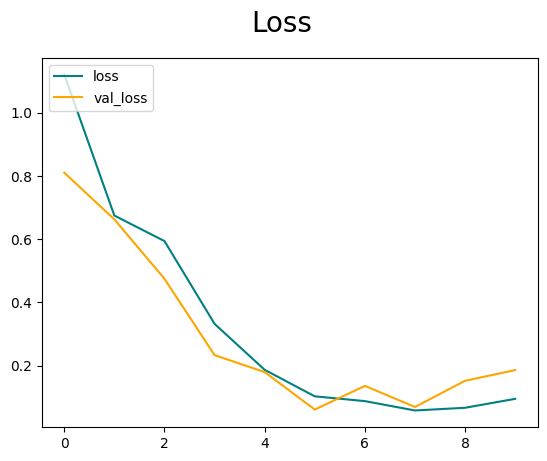

In [17]:
#Representation of Training and validation loss
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

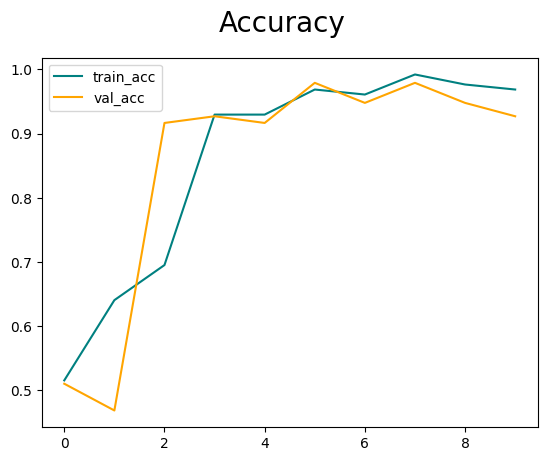

In [18]:
#Representation of Training and validation Accuracy
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='train_acc')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

  - *E2* - Testing the models in the dataset. In below couple of code snippets, the model is evaluated 

[top](#scrollTo=4i5afvUbhmGo)


In [19]:
# Write your codes for E2 here. Create more code cells if needed
#Importing precicion,recall and accuracy
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [20]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [21]:
#Calculating Accuracy, precision and recall for all batches

for batch in test_data_1.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)

  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 368ms/step


In [22]:
#printing all test paramaters
print(f' Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Test Accuracy: {(acc.result().numpy())*100}%')

 Precision: 0.8620689511299133, Recall: 1.0, Test Accuracy: 92.00000166893005%


In [23]:
loss,accura=model.evaluate(test_data_1.as_numpy_iterator())

print("Loss = ",loss," Accuracy = ",accura)

7/7 [==============================] - 4s 547ms/step - loss: 0.2109 - accuracy: 0.9200
Loss =  0.21091295778751373  Accuracy =  0.9200000166893005


<h3>Predicting the class of unseen Images</h3>
<p>In the below code snippet, I tried to give an unseen image as the input test data and Here are the results</p> 

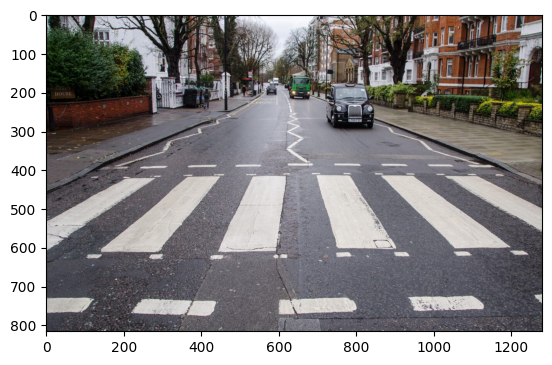

In [24]:
#predicting actual images
img1=cv.imread('/content/drive/MyDrive/Deep_Learning_Assignment/other_unseen_data/abbey-2293953_1920-1280x816.jpg')
plt.imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
plt.show()


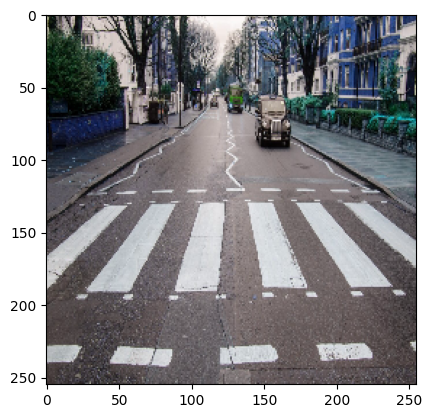

In [25]:
#Resizing the Image for the compatibility
resize1=tf.image.resize(img1,(255,255))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [26]:
yhat1=model.predict(np.expand_dims(resize1/255,0))

1/1 [==============================] - 0s 137ms/step


In [27]:
print(yhat1)

[[1.]]


In [28]:
if yhat1>0.5:
  print("the given image is of the street")
else:
  print("the given image is of the forest")

the given image is of the street
